# **Facebook Data Analysis**

# Introduction

As the technological revolution has rapidly accelerated, social media has become increasingly influential in everyday lives. In particular, Facebook is a social media platform used by companies to post media and promote their brand and products. With 24 hours in a day, we wondered if there is a more specific time in a day that attracts higher engagement (consisting of likes, comments, and shares) on a post than other times of day. Knowing the best time to post would help companies maximize their post engagement.

To determine the best hour in the week when posting content is most impactful, we asked the question:
**When is the best hour of the week to post on Facebook for maximum post interactions?**
More specifically, we will be predicting total post interaction (the number of total likes, shares, and comments on a post) based on the hour of the week. We chose to determine the “hour of the week” as it provides a wider range of results (an entire week’s worth of hours versus a single day), providing a more specific and thorough answer than just considering hour of day.

The dataset that will be used to answer the question is from a study called *Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach.* The dataset is about posts published in 2014 on a renowned cosmetics brand’s Facebook page, which primarily focuses on consumer engagement and interaction. Most notably, it contains columns that feature the lifetime number of visits on the post (total impressions and reach), as well as the number of people who have liked and engaged on the post (lifetime people who have liked and engaged on your post). In this report, we will be focusing on columns of the time of the post itself (more specifically, “Post Hour” and “Post Day”, although there are other columns), and the number of total interactions (likes, comments, and shares). 

As such, we will mutate a new variable for “Hour of Week'' as our predictor variable, combined from the “Post Hour” and “Post Day” variables, with a range of Hour 0 (Sunday, 12:00 AM) to Hour 167 (Saturday 11:59 PM) (there are 168 hours in a week and here we begin counting from 0, not 1).  Furthermore, we will use the variable “Total Interactions”, which is the sum of the “Likes”, “Comments”, and “Shares” columns as our target variable. We chose these variables because we’d like to keep it simple to understand for our readers, and we are only concerned about the overall number of interactions.

# Methods & Results 

## Loading in Libraries & Reading in Data

Before we begin coding, we must load the required libaries for R.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(digest)
library(repr)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Next, we will begin reading the file into JupyterHub. Since the file is retrieved from an outside URL, we will download the file to JupyterHub, and since the cells are seperated by semi-colons, instead of normally reading the file through read_csv, we will read the file by read_csv2.

In [2]:
#reading the data
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip",temp)

#Reading the data in R
facebook <- read_csv2(unz(temp, "dataset_Facebook.csv"))
head(facebook)
unlink(temp)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  `Page total likes` = col_double(),
  Type = col_character(),
  Category = col_double(),
  `Post Month` = col_double(),
  `Post Weekday` = col_double(),
  `Post Hour` = col_double(),
  Paid = col_double(),
  `Lifetime Post Total Reach` = col_double(),
  `Lifetime Post Total Impressions` = col_double(),
  `Lifetime Engaged Users` = col_double(),
  `Lifetime Post Consumers` = col_double(),
  `Lifetime Post Consumptions` = col_double(),
  `Lifetime Post Impressions by people who have liked your Page` = col_double(),
  `Lifetime Post reach by people who like your Page` = col_double(),
  `Lifetime People who have liked your Page and engaged with your post` = col_double(),
  comment = col_double(),
  like = col_double(),
  share = col_double(),
  `Total Interactions` = col_double()
)



Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186


Table 1: Initial Dataset of Table

Looking at our dataset, it passes the test for tidy data (each row is a single observation, each column is a single variable, each value is a single cell), so no further cleaning data tools are required. However, the variable names are separated by white spaces instead of underscores (_). To deal with this issue, we will rename our predictor columns to avoid additional headaches along the way. 

In [3]:
#Renaming "Post Hour"
facebook_1 <- facebook %>% rename(post_hour = `Post Hour`) %>% 
    rename(post_day = `Post Weekday`) %>% 
    rename(total_interactions = `Total Interactions`)

## Exploratory Data Analysis and Splitting Data

As part of our exploratory data analysis, we'll take a quick overview of our predictor variable, plotting "Total Interactions" against a time variable (in this case, we'll use Post Hour) through a scatterplot, just to filter out any potential outliers in our data.

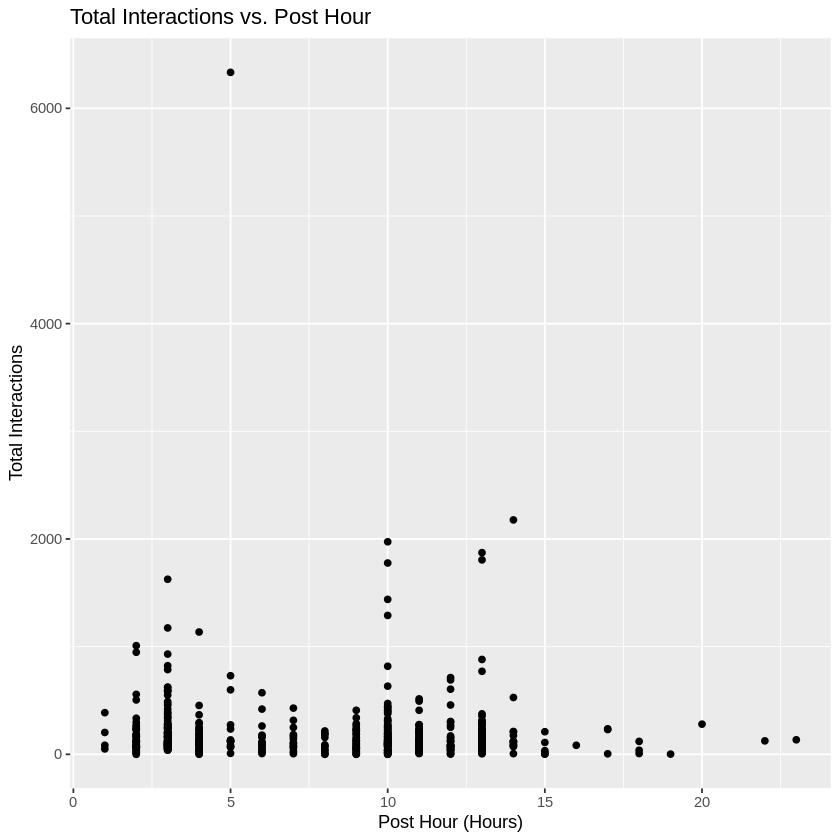

In [4]:
exploratory_scatter_plot <- ggplot(facebook_1, aes(x = post_hour, y = total_interactions)) +
                            geom_point() +
                            labs(x = "Post Hour (Hours)", y = "Total Interactions", title = "Total Interactions vs. Post Hour") 
exploratory_scatter_plot

Figure 1: Exploratory Scatter Plot

Hmmm. It seems here that there is one post that has more than six thousand total interactions, with only around ten posts that have more than a thousand total interactions. These outliers can cause implications as it can skew the results of our data (large standard deviations) and make our graph look silly, like in the example above. Therefore, let's filter our total interactions to be less than a thousand to retrieve the most optimal results when we perform our regression models. And as stated in our introduction, let's also create a new variable for the hour of the week through the mutate function.

In [5]:
set.seed(2021)
facebook_filtered_interactions <- facebook_1 %>% filter(total_interactions < 1000) %>% 
    mutate(hour_of_week = (post_day - 1) * 24 + post_hour)
facebook_filtered_interactions

Page total likes,Type,Category,Post Month,post_day,post_hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,total_interactions,hour_of_week
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100,75
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164,58
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80,51
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
81370,Photo,1,1,5,2,0,3778,7216,625,572,795,4742,2388,363,4,93,18,115,98
81370,Photo,3,1,4,11,0,4156,7564,626,574,832,4534,2452,370,7,91,38,136,83
81370,Photo,2,1,4,4,NA,4188,7292,564,524,743,3861,2200,316,0,91,28,119,76


Table 2: Filtering of Total Interactions and Addition of Post_Week Variable Table

Here we check that we have included our hour_of_week variable properly into the dataset, and sure enough, it is.

Next, let's build our exploratory table of our training dataset that we will be performing our K-Nearest Neighbors Regression on, which includes the number of rows, the number of columns and the number of rows with missing data values. However, to find to the means to our predictor variables (likes, comments, shares, and our total interactions), we will also need to filter out the number of rows with missing data values, so that we would not encounter any problems (such as a "NA" result) when finding the average. Altogether, we will mutate each of the results we found into one big table in the end.

In [6]:
set.seed(2021)

#Filtering missing data
facebook_filtered_na <- facebook_filtered_interactions %>%
                            filter(!is.na(Paid)) %>% 
                            filter(!is.na(comment)) %>% 
                            filter(!is.na(like)) %>% 
                            filter(!is.na(share)) %>%                          
                            filter(!is.na(total_interactions))

#Missing Rows of Data
missing_rows <- sum(colSums(is.na(facebook)))

#Average of Each Predictor Variable
average_likes <- mean(facebook_filtered_na[["like"]])
average_comments <- mean(facebook_filtered_na[["comment"]])
average_shares <- mean(facebook_filtered_na[["share"]])
average_total_interactions <- mean(facebook_filtered_na[["total_interactions"]])

#Total Number of Observations
observation_total <- nrow(facebook_filtered_na)

#Total Number of Variables
variable_total <- ncol(facebook_filtered_na)

#Exploratory Data Analysis Table
exploratory_table <- facebook_filtered_na %>%
                     mutate(facebook_filtered_na, observation_total = observation_total) %>%
                     mutate(facebook_filtered_na, variable_total = variable_total) %>%
                     mutate(facebook_filtered_na, average_likes = average_likes) %>%
                     mutate(facebook_filtered_na, average_comments = average_comments) %>%
                     mutate(facebook_filtered_na, average_shares = average_shares) %>%
                     mutate(facebook_filtered_na, average_total_interactions = average_total_interactions) %>%
                     mutate(facebook_filtered_na, missing_rows = missing_rows) %>%
                     select(observation_total, variable_total, average_likes, average_comments, average_shares, average_total_interactions,
                            missing_rows) %>%
                     slice(1)
exploratory_table

observation_total,variable_total,average_likes,average_comments,average_shares,average_total_interactions,missing_rows
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
483,20,141.2733,5.621118,23.49689,170.3913,6


Table 3: Exploratory Data Analysis Table

Based on these results of our exploratory table, we can notice a few things. First off, there are 483 observations, meaning that theres a lot of data to process! This means that regardless of the amount of folds specified for cross validation, our accuracy of our regression model won't be perfect. Our results will only provide a rough estimate of the true results, which will be sufficient enough for answering our question. Also to keep in mind is the average of total interactions, which will serve as a baseline later when we compare our results.

Next, let's create a quick visualization of our dataset of our predictor and target variables (total interactions and hour of week) through the function ggpairs. 

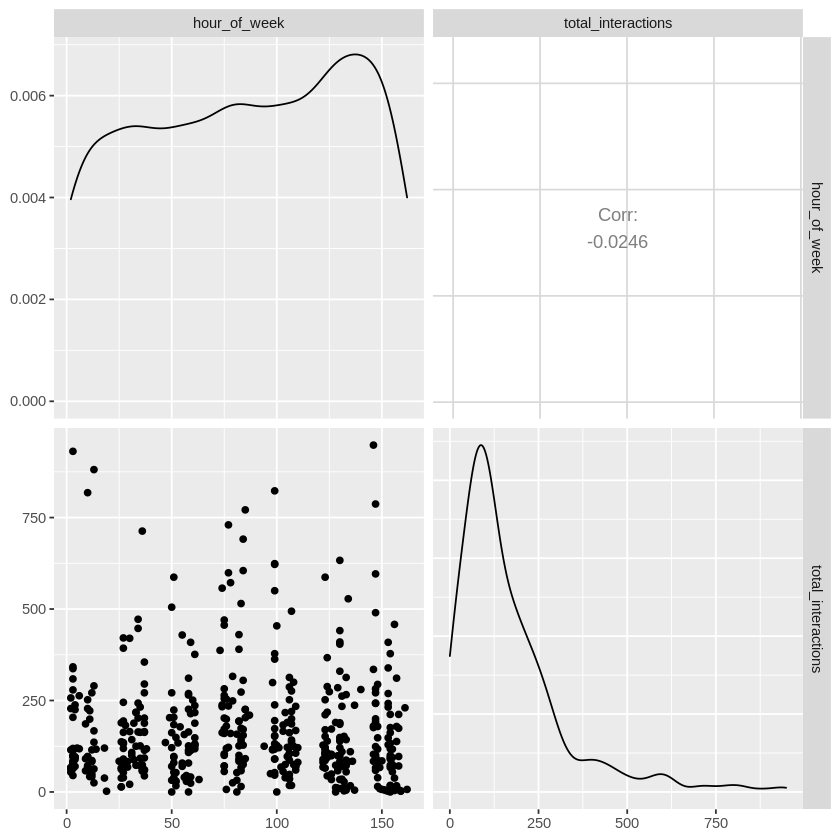

In [7]:
facebook_ggpairs2 <- facebook_filtered_interactions %>%
    select(hour_of_week, total_interactions) %>% 
    ggpairs()
facebook_ggpairs2

Figure  2: Ggpairs Dataset between Hour_of_Week and Total_Interactions  

Looking at the relationship between Hour of Week and Total Interactions, there seems to have no correlation between the two variables. This means as that as the week progresses, this does not affect the number of total interactions, and vice versa. While this may serve as an initial indicator for a poor showing of results, it's better if we perform the data analysis to see if this is true.

## Regression

As we are clearly predicting a numerical value, this is a regression problem, predicting the highest engagement based on the hour of the week. As with any regression or classification model at the start, we'll split the data into training and testing data, setting aside 75 percent for the training data set and 25 percent with our testing data set, and setting our strata to be total interactions.

We will be using both K-nearest neighbours regression and simple linear regression to answer our problem.

In [8]:
#Split into training (75 percent of data set) and test data
set.seed(2021)
facebook_split <- initial_split(facebook_filtered_na, prop = 0.75, strata = total_interactions)
facebook_train <- training(facebook_split)
facebook_test <- testing(facebook_split)

### K-nearest Neighbour Regression

Let's begin finding the most optimal K for our regression model. First we'll build a recipe and model specification, setting aside the variables required for our analysis, and as a good measure scaling our predictors for our recipe. We'll also set the neighbors to "tune" and mode to "regression" for our model specification. 

In [9]:
set.seed(2021)
#Recipe for Post Hour
facebook_recipe <- recipe(total_interactions ~ hour_of_week, data = facebook_train) %>%
                   step_scale(all_predictors()) %>%
                   step_center(all_predictors())
#Model
facebook_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                 set_engine("kknn") %>%
                 set_mode("regression")

Next, let's use cross-validation for five folds, and begin creating our workflow by adding our recipe and model. Next, we'll want to test 200 values of K by creating a tibble containing a sequence of 200 rows of K. Finally, we'll tune our workflow with the 200 values of K from gridivals, and make sure it resamples in our cross-validation data set.

In [26]:
set.seed(2021)
#5 fold cross validation
facebook_vfold <- vfold_cv(facebook_train, v = 5, strata = total_interactions)

#workflow
facebook_workflow <- workflow() %>%
                     add_recipe(facebook_recipe) %>%
                     add_model(facebook_spec)

#testing 200 values to find the best value for K
gridvals <- tibble(neighbors = seq(1, 200))

#tuning workflow and resampling cross validation data set
facebook_results <- facebook_workflow %>%
                        tune_grid(resamples = facebook_vfold, grid = gridvals) %>%
                        collect_metrics()
facebook_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,2.173488e+02,5,4.934918008,Model001
1,rsq,standard,5.989398e-03,5,0.001365001,Model001
2,rmse,standard,1.953582e+02,5,9.570870421,Model002
⋮,⋮,⋮,⋮,⋮,⋮,⋮
199,rsq,standard,0.01374372,5,0.009688423,Model199
200,rmse,standard,162.32905375,5,5.462877103,Model200
200,rsq,standard,0.01419990,5,0.008584433,Model200


Table 4: RMSE Table

Lastly, we'll filter for the minimum RMSE value to help us find our most optimal K.

In [11]:
#Min amount of RMSPE along with mean and standard error to find the best K value to use
facebook_min <- facebook_results %>%
    filter(.metric == "rmse") %>%
    arrange(mean)  %>% 
    slice(1)

facebook_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
93,rmse,standard,161.1096,5,5.728928,Model093


Figure 3: Best K, shown as 93 neighbors


With our most optimal K, lets finally repeat the steps earlier, using the k_min as our nearest neigbours, refiting our knn regression model, and predicting the model using  test data instead of training data.

In [12]:
#Min RMSPE
set.seed(2021)
k_min <- facebook_min %>%
            pull(neighbors)

#Using the best K in our model
facebook_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
                            set_engine("kknn") %>%
                            set_mode("regression")

#Reworking the workflow to incorporate our chosen K
facebook_best_fit <- workflow() %>%
                        add_recipe(facebook_recipe) %>%
                        add_model(facebook_best_spec) %>%
                        fit(data = facebook_train)

#Summary of the training vs testing data
facebook_summary <- facebook_best_fit %>% 
                       predict(facebook_test) %>%
                       bind_cols(facebook_test) %>%
                       metrics(truth = total_interactions, estimate = .pred)  
facebook_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,134.92938185
rsq,standard,0.04724075
mae,standard,105.24731183


Table 5: RMSPE value from cross-validation of the best mode

The $RMSPE$ value is from our testing data set is 134.92, which is lower than 161.1096, the $RMSPE$ value for the cross-validation of our best mode. This means that our model is better on the test data than on the training data.

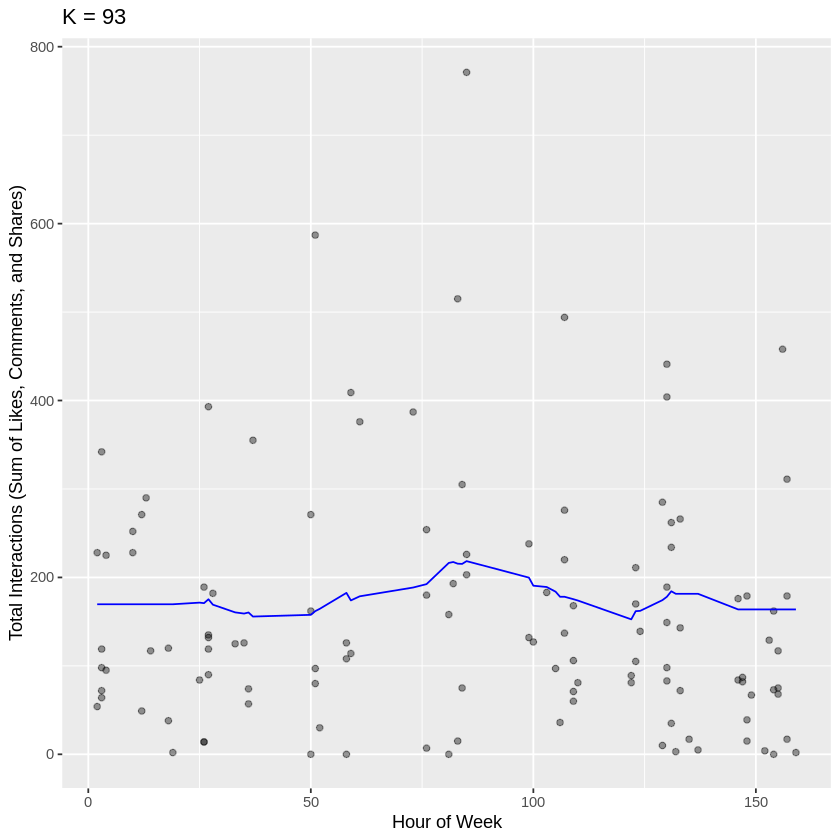

In [13]:
#set.seed(2021)
facebook_preds <-  facebook_best_fit %>%
                   predict(facebook_test) %>%
                   bind_cols(facebook_test)
facebook_plot_final <- ggplot(facebook_preds, aes(x = hour_of_week, y = total_interactions)) +
                       geom_point(alpha = 0.4) +
                       xlab("Hour of Week") +
                       ylab("Total Interactions (Sum of Likes, Comments, and Shares)") +
                       geom_line(data = facebook_preds, aes(x = hour_of_week, y = .pred), color = "blue") +
                       ggtitle(paste0("K = ", k_min))
facebook_plot_final

Figure 4: Final Graph between Total Interactions and Hour of Week

Finally we will use facebook_preds to see which hour of the week has the highest predicted interactions. We created a function that converts the post_day from a numerical value to characters so that it is easier to see exactly which day and hour has the highest predicted interactions.

In [14]:
#function that converts post_day (weekday as a number from 1 to 7) to name of day
weekday_no_to_name <- function(day_num) {
    day <- switch(day_num, "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")
    return(day)
}

In [15]:
# Show post hours, weekdays with highest post stats
facebook_best <- facebook_preds %>% 
    select(.pred, post_day, post_hour, hour_of_week) %>%
    group_by(hour_of_week, post_day, post_hour) %>%
    summarize(predicted_interactions = mean(.pred)) %>% # same hour and weekday have same prediction; used summarize to remove duplicates
    mutate(post_day = map(post_day, weekday_no_to_name)) %>% # convert weekday numbers to weekday names
    arrange(desc(predicted_interactions))
head(facebook_best)

`summarise()` regrouping output by 'hour_of_week', 'post_day' (override with `.groups` argument)



hour_of_week,post_day,post_hour,predicted_interactions
<dbl>,<list>,<dbl>,<dbl>
85,Wednesday,13,218.4086
82,Wednesday,10,217.4194
81,Wednesday,9,216.3978
83,Wednesday,11,215.5376
84,Wednesday,12,215.2796
99,Thursday,3,199.7742


Table 6: Best 6 times to post based on KNN regression model

### Linear Regression

KNN Regression isn't the only method for prediction quantatative values. Another method is Linear Regression, which instead of looking at the K-nearest neighbours and averaging over their values for a prediction, we use all the training data points to create a straight line of best fit. This line is then used to "look up" the predicted value. This different prediction method may give us more accurate results, so we will be creating a linear regression model for further analysis and comparison to our KNN model later on in the report.

Using our training data from before, we start by creating a new model specification that sets the engine to "lm" and the mode to "regression" (like before) and a new recipe. Unlike the KNN Facebook recipe, we do not need to scale and center the data for linear regression as standardization does not affect the fit of the model at all. It does impact the coefficients in the linear slope equation though, but its usually easier to interpret the best fit coefficients if we don't standardize so we're choosing not to.

In [20]:
fb_spec <- linear_reg() %>%
    set_engine("lm") %>%
    set_mode("regression")

fb_recipe <- recipe(total_interactions ~ hour_of_week, data = facebook_train)

fb_fit <- workflow() %>%
    add_recipe(fb_recipe) %>%
    add_model(fb_spec) %>%
    fit(data = facebook_train)
fb_fit

facebook_linear_preds <- fb_fit %>%
                   predict(facebook_test) %>%
                   bind_cols(facebook_test)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  hour_of_week  
   175.02958      -0.00181  


From the given model, we see that our coefficients are (intercept) β0 = 175.02958, and (slope) β1 = -0.00181. This gives us a slope equation of:

$ total \ interactions = 175.02958 - 0.00181 * hour \ of \ week$

The model is predicting that interactions roughly start at 180.85, and every hour_of_week decreases total interactions by 0.00181. This fits our exploratory analysis earlier, where we initially discovered that there is no correlation between hour_of_week and total interactions.

Next, we calculate the $RMSE$  to assess goodness of fit on fb_fit. This tells us how well our linear regression model predicts on the training data used to fit the model.

In [21]:
lm_rmse <- fb_fit %>%
         predict(facebook_train) %>%
         bind_cols(facebook_train) %>%
         metrics(truth = total_interactions, estimate = .pred) %>%
         filter(.metric == "rmse") %>%
         select(.estimate)  %>%
         pull()
lm_rmse

[1] 162.5757

We also calculate the $RMSPE$ using our training data

In [22]:
fb_test_results <- fb_fit %>%
    predict(facebook_test) %>%
    bind_cols(facebook_test) %>%
    metrics(truth = total_interactions, estimate = .pred) %>%
         filter(.metric == "rmse") %>%
         select(.estimate)  %>%
         pull()

fb_test_results

[1] 137.321

The $RMSPE$ value is from our testing data set is 137.32, which is lower than 162.58, the $RMSE$ value. This means that our model is better on the test data than on the training data.
<br> <br>
The next and final step is to graph the relationship.

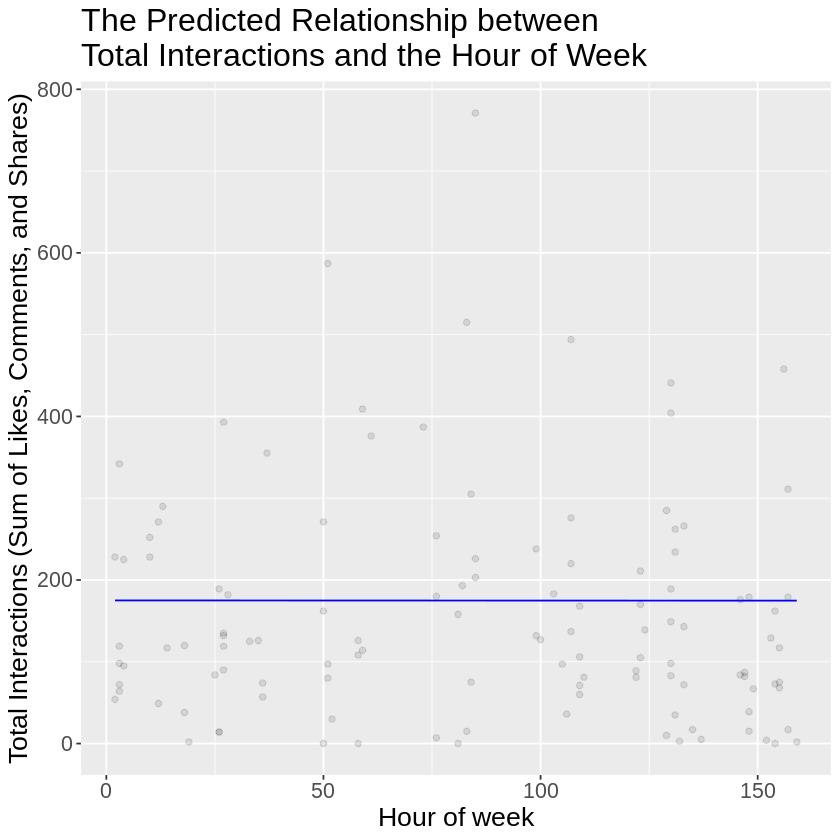

In [23]:
facebook_plot_final <- ggplot(facebook_linear_preds, aes(x = hour_of_week, y = total_interactions)) +
                       geom_point(alpha = 0.1) +
                       xlab("Hour of week") +
                       ylab("Total Interactions (Sum of Likes, Comments, and Shares)") +
                       geom_line(data = facebook_linear_preds, aes(x = hour_of_week, y = .pred), color = "blue") +
                       ggtitle("The Predicted Relationship between 
Total Interactions and the Hour of Week") +
                       theme(text = element_text(size = 16)) 
facebook_plot_final

Figure 5: Graph of Total Interactions vs Hour of Week using Linear Regression

Finally we will use facebook_linear_preds to see which hour of the week has the highest predicted interactions.

In [24]:
facebook_best <- facebook_linear_preds %>% 
    select(.pred, post_day, post_hour, hour_of_week) %>%
    group_by(hour_of_week, post_day, post_hour) %>%
    summarize(predicted_interactions = mean(.pred)) %>% # same hour and weekday have same prediction; used summarize to remove duplicates
    mutate(post_day = map(post_day, weekday_no_to_name)) %>% # convert weekday numbers to weekday names
    arrange(desc(predicted_interactions))
head(facebook_best)

`summarise()` regrouping output by 'hour_of_week', 'post_day' (override with `.groups` argument)



hour_of_week,post_day,post_hour,predicted_interactions
<dbl>,<list>,<dbl>,<dbl>
2,Sunday,2,175.0260
3,Sunday,3,175.0242
4,Sunday,4,175.0223
10,Sunday,10,175.0115
12,Sunday,12,175.0079
13,Sunday,13,175.0061


Table 7: Best 6 times to post based on linear regression model

The visualization of the model affirms what our model was predicting earlier; the correlation between Total Interactions and Hour of Week is minimal. The slope of the line is nearly zero, indicating that the relationship is very weak, but it is still a weak negative slope. This does show that there is a relationship between the two variables, but this relationship serves no purpose for predictive analysis.

# Discussion

To summarize, both KNN regression and linear regression indicated that there is little correlation between the hour of week and the total number of interactions. However, upon further examination of the regression models, we can spot some observations that can help us answer our question, when is the best hour of the week to post for the highest interaction?

Looking at the graph of hour of the week vs, total interactions based on KNN regression (Figure 4), we see that the regression line has a slight peak in the middle of the graph. This corresponds to the results in Table 6, which indicate that the 5 highest predicted interactions occur on Wednesday between 09:00 to 13:00. 

On the other hand, the graph of hour of the week vs, total interactions based on linear regression (Figure 5), looks almost completely constant to the naked eye. In fact, the slope of the regression line is -0.00181, which is incredibly small. The negative slope indicates that generally posts have higher interactions at the beginning of the week (Sunday) than at the end of the week (Saturday). Table 7, which indicates that the 6 highest predicted interactions occur on Sunday, which confirms our analysis of Figure 5. 

Comparing the RMSPE values for both regression models can give us a clearer picture of the accuracy of our models. The RMSPE value for KNN regression is 134.92, while the RMSPE value for linear regression is 137.32. Since the RMSPE is lower for KNN regression than linear regression, our KNN regression model provided a slightly better fit on test data than our linear regression model. Using KNN regression also makes more sense in the context of our question because it is more likely that there are peaks throughout the week where posts have higher engagement than if post interaction only increases or decreases throughout the week. The regression line for KNN regression allows for such peaks to exist, while the linear regression does not allow for such peaks. 

Given that the RMSPE value for KNN regression is slightly smaller, and the fact that KNN regression allows for peaks to exist, we can answer our question, when is the best hour of the week to post for the highest interaction? Although the correlation is very weak, posting between 0900h and 1300h on Wednesdays is likely to result in the highest post interactions for this specific cosmetic brand. 

### Expectations

Our results were not what we expected. We expected that there would be a relationship between the time of a post and the number of interactions a post has. Specifically, we expected to find that a post on the weekends or evenings would garner more interactions than during the weekdays because weekends and evenings are leisure time for many people. Moreover, we expected that there would be a stronger correlation between post hour and total interactions. 

### Impact

In a Sprout Social article, they found that the best times to post for highest global engagement on Facebook is Wednesdays, 11 a.m. and 1–2 p.m, and the worst time to post is on Sundays. In a different article by Buffer, they state that “the best time to post to Facebook is between 1pm – 3pm on during the week and Saturdays.”

Our own study and the study conducted by Sprout Social and Buffer all give different results for when the best time to post on facebook. Our findings are based on one sole brand. The target audience of this cosmetic brand may be different than that of a tech company or even a different cosmetic brand. From this we could say that there is no universal best time to post. There is so much content being posted on Facebook everyday. Perhaps the best time to post depends on a number of other factors beyond the scope of our project, such as the type of post, whether posts are paid, or posts made by others.

Our findings can be useful to the cosmetic brand to maximize their post engagement and boost their profits. Moreover, our methods could be useful for all companies when assessing their own post engagement. 

### Future Questions

From here, there are many future questions that could be asked. These include:
- Is it true for other social media platforms or just Facebook? 
- Is there a large difference between post interactions on a paid post versus a normal post?


# References

Literature 1 (Dataset): 

Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand 
building: A data mining approach. Journal of Business Research, 69(9), 3341-3351. https://doi.org/10.1016/j.jbusres.2016.02.010.

Literature 2:

Read, A. (2021, January 6). Best time to post on Facebook in 2021: A complete guide. Buffer. https://buffer.com/library/best-time-to-post-on-facebook/

Literature 3:

Arens, E. (2020, August 3). The best times to post on social media in 2020. Sprout Social. https://sproutsocial.com/insights/best-times-to-post-on-social-media/